# **Install and import libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install minisom

In [ ]:
pip install tslearn

In [ ]:
pip install hvplot

In [ ]:
#  import the necessary libraries and load the files needed for Exploratory Data Analysis
import os
import math
import hvplot.pandas
from scipy import stats
# Essential Libraries
import pandas as pd  # data manipulation
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np   # linear algebra
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib for plotting graphs
# %matplotlib inline renders plot inline on your page
%matplotlib inline
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Loading Data**

In [ ]:
# read the csv file and load to a dataframe
#Pre-requisite
from google.colab import files
import pandas as pd

# Upload the CSV file from your local machine
# uploaded = files.upload()

# Read the CSV file into a Pandas DataFrame
#Location of dataset file
# file = "Dataset.csv"
file = "/content/drive/My Drive/SSO/Dataset.csv"
df = pd.read_csv(file)
file1 = "/content/drive/My Drive/SSO/Dataset_1.csv"
df1 = pd.read_csv(file1)

# Display the first few rows of the DataFrame to check the data
df.head()
df1.head()

,Unnamed: 0,X,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,BUN_Cre,Elder
0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.54,0,NaN,NaN,-0.02,1,0,17072,NaN,1
1,2,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,...,68.54,0,NaN,NaN,-0.02,2,0,17072,NaN,1
2,3,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,...,68.54,0,NaN,NaN,-0.02,3,0,17072,NaN,1
3,4,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,...,68.54,0,NaN,NaN,-0.02,4,0,17072,NaN,1
4,5,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,...,68.54,0,NaN,NaN,-0.02,5,0,17072,28.75,1


In [ ]:
# Convert 'SepsisLabel' to factor (categorical)
df1['SepsisLabel'] = df1['SepsisLabel'].astype('category')

# Number of patients
num_patients = len(df1['Patient_ID'].unique())
print("Number of total patients", num_patients) #40336


# Get numbers of male and female
# Male
male_count = len(df1[(df1['Gender'] == 1)]['Patient_ID'].unique())
print("Number of total male patients", male_count)  #22566

# Female
female_count = len(df1[(df1['Gender'] == 0)]['Patient_ID'].unique())
print("Number of total female patients", female_count)  #17770

# Get IDs of patients who developed sepsis
sepsis_Pid = df1[df1['SepsisLabel'] == 1]['Patient_ID'].unique()

# Count the number of patients who developed sepsis
sepsis_count = len(sepsis_Pid)
print("Number of total patients with sepsis",sepsis_count)  #2932

# Get IDs of patients who did not develop sepsis
nosepsis_Pid0 = df1[df1['SepsisLabel'] == 0]['Patient_ID'].unique()
nosepsis_Pid = set(nosepsis_Pid0) - set(sepsis_Pid)

# Count the number of patients who did not develope sepsis
nosepsis_count = len(nosepsis_Pid)
print("Number of total patients without sepsis",nosepsis_count) #

# Calculate the number of male and female patients who developed sepsis
male_sepsis_count = len(df1[(df1['Patient_ID'].isin(sepsis_Pid)) & (df1['Gender'] == 1)]['Patient_ID'].unique())
female_sepsis_count = len(df1[(df1['Patient_ID'].isin(sepsis_Pid)) & (df1['Gender'] == 0)]['Patient_ID'].unique())

# Print the counts
print("Number of male patients who developed sepsis:", male_sepsis_count) #1739
print("Number of female patients who developed sepsis:", female_sepsis_count) #1193

### Check Here

# Calculate the mean age for patients who developed sepsis
mean_age_sepsis = df1[df1['SepsisLabel'] == 1].drop_duplicates(subset='Patient_ID')['Age'].mean()
print("Mean age for patients who developed sepsis:", mean_age_sepsis) #62.05

# Calculate the mean age for patients who did not develop sepsis
mean_age_no_sepsis = df1[(df1['SepsisLabel'] == 0) & (~df1['Patient_ID'].isin(sepsis_Pid))]\
    .drop_duplicates(subset='Patient_ID')['Age'].mean()
print("Mean age for patients who did not develop sepsis:", mean_age_no_sepsis) #61.61

# List of patients who have sepsis before admission to ICU
sepsis_beforeICU=df['Patient_ID'][(df['SepsisLabel']==1) & (df['Hour']==0)]

# Dataframe of patient who have sepsis before admission to ICU
sepsis_beforeICU_df=df[df.Patient_ID.isin(sepsis_beforeICU)]

# Count the number of patients who have sepsis before ICU admission
sepsis_before_ICU_count = len(df[(df['SepsisLabel'] == 1) & (df['Hour'] == 0)]['Patient_ID'].unique())
print("Number of patients who have sepsis before ICU admission:", sepsis_before_ICU_count)

# Dataframe of patient who have sepsis after admission to ICU
sepsis_after_ICU_df = septis_df[~septis_df['Patient_ID'].isin(sepsis_beforeICU_df['Patient_ID'])]

# Count the number of patients who did not have sepsis before ICU admission
sepsis_after_ICU_count = sepsis_count - sepsis_before_ICU_count
print("Number of patients who have sepsis after ICU admission:",sepsis_after_ICU_count)

# Get IDs of patients who did not develop sepsis
nosepsis_Pid0 = df[df['SepsisLabel'] == 0]['Patient_ID'].unique()
nosepsis_Pid = set(nosepsis_Pid0) - set(sepsis_Pid)

# Dataframe of patient who did not have sepsis
nonseptis_df=df[df.Patient_ID.isin(nosepsis_Pid)]



Number of total patients 40336
Number of total male patients 22566
Number of total female patients 17770
Number of total patients with sepsis 2932
Number of total patients without sepsis 37404
Number of male patients who developed sepsis: 1739
Number of female patients who developed sepsis: 1193
Mean age for patients who developed sepsis: 62.055982264665765
Mean age for patients who did not develop sepsis: 61.61108384130039


In [ ]:
(df1.index + 1).astype(int)
df1['Unnamed: 0'].astype(int)

0                1
1                2
2                3
3                4
4                5
            ...   
1552205    1552206
1552206    1552207
1552207    1552208
1552208    1552209
1552209    1552210
Name: Unnamed: 0, Length: 1552210, dtype: int64

In [ ]:
df1['Unnamed: 0'].astype(int).equals((df1.index + 1).astype(int))

False

In [ ]:
checktf = list((df1.index + 1).astype(int)) == df1['Unnamed: 0'].astype(int)
all(checktf)

True

In [ ]:
checktf = df1['X'] == df1['Hour']
all(checktf)

True

In [ ]:
df1 = df1.drop('Unnamed: 0', axis=1)

In [ ]:
df1 = df1.drop('X', axis=1)

In [ ]:
df1.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,BUN_Cre,Elder
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.54,0,NaN,NaN,-0.02,1,0,17072,NaN,1
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,...,68.54,0,NaN,NaN,-0.02,2,0,17072,NaN,1
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,...,68.54,0,NaN,NaN,-0.02,3,0,17072,NaN,1
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,...,68.54,0,NaN,NaN,-0.02,4,0,17072,NaN,1
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,...,68.54,0,NaN,NaN,-0.02,5,0,17072,28.75,1


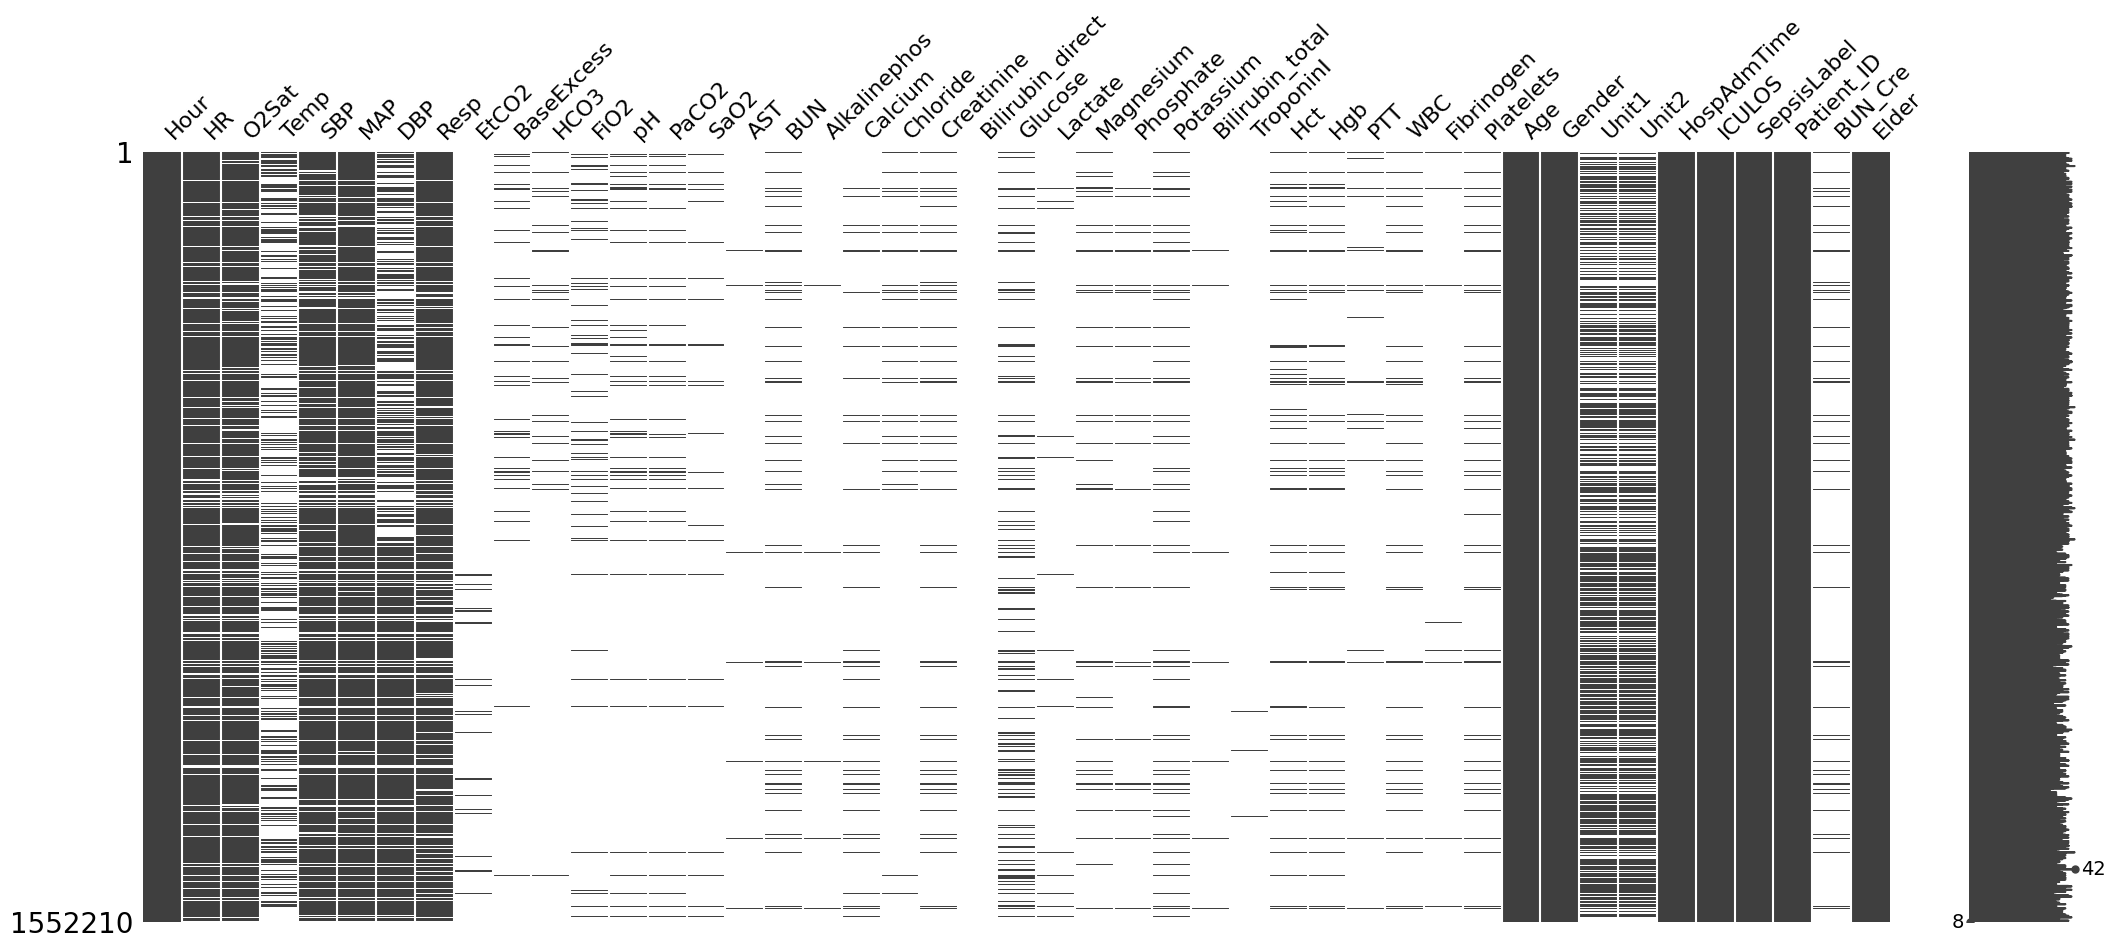

In [ ]:
# Check for missing data
missing_data = df1.isna().sum()
# Visualize missing data
msno.matrix(df1)
plt.show()

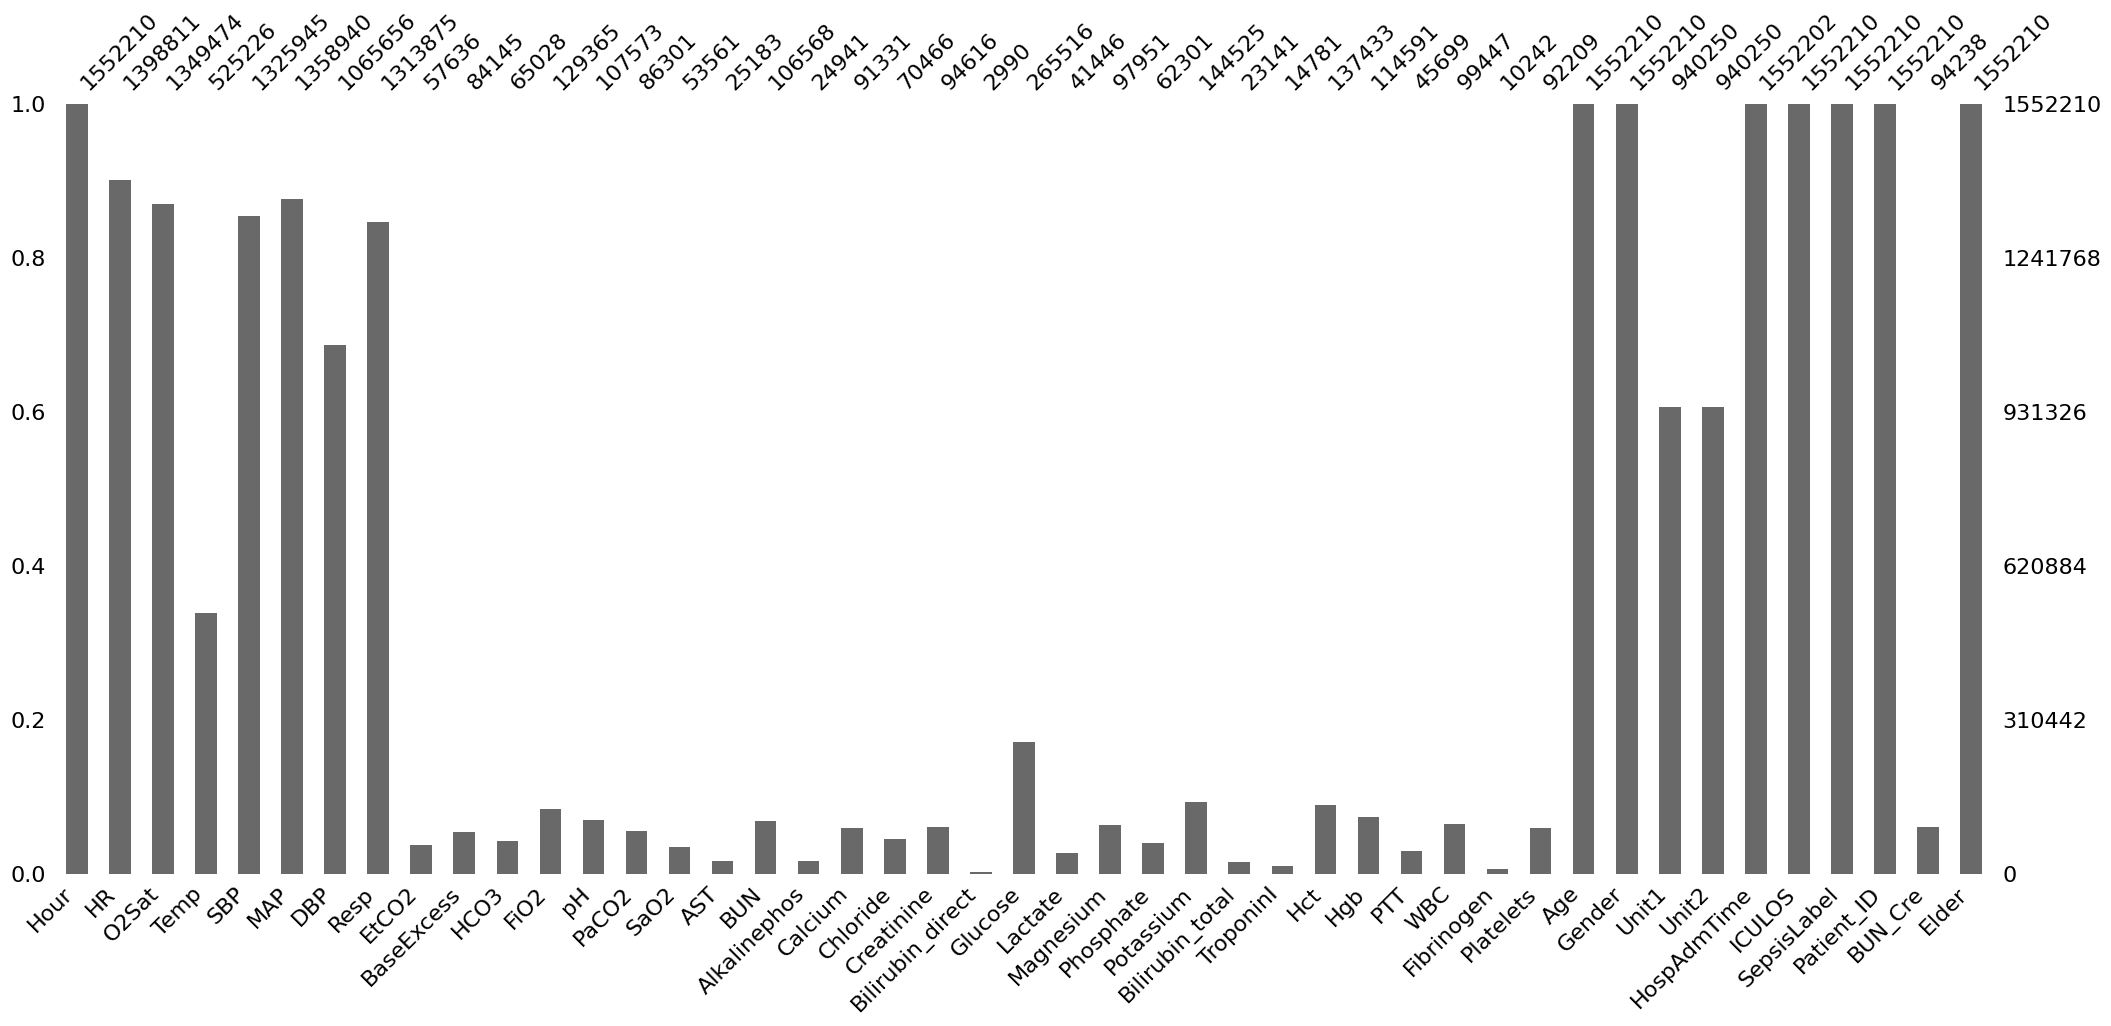

In [ ]:
# Bar Plot of Missing Data:
msno.bar(df1)
plt.show()

Exploratory analysis for data at time 0 and 50th and 75th percentiles

> Indented block



In [ ]:
# extract

idx = df1.groupby('Patient_ID')['Hour'].idxmax()

In [ ]:
# Filter rows with SepsisLabel == 1
sepsis_patients = df[df['SepsisLabel'] == 1]

# Create an empty DataFrame to store results
result_df = pd.DataFrame(columns=['Patient_ID', 'SepsisLabel', 'Hour', 'WBC'])

# Iterate through sepsis patients
for _, row in sepsis_patients.iterrows():
    patient_id = row['Patient_ID']
    sepsis_hour = row['Hour']

    # Filter rows for the same patient within the 6-hour window
    patient_data = df[(df['Patient_ID'] == patient_id) & (df['Hour'] <= sepsis_hour) & (df['Hour'] >= sepsis_hour - 6)]

    # Find the closest WBC value to sepsis_hour
    closest_wbc_value = None
    min_time_difference = np.inf

    for _, patient_row in patient_data.iterrows():
        if not pd.isna(patient_row['WBC']):
            time_difference = abs(sepsis_hour - patient_row['Hour'])
            if time_difference < min_time_difference:
                closest_wbc_value = patient_row['WBC']
                min_time_difference = time_difference

    # Append the patient's data with the closest WBC value to the result DataFrame
    result_df = result_df.append({'Patient_ID': patient_id, 'SepsisLabel': 1, 'Hour': sepsis_hour, 'WBC': closest_wbc_value}, ignore_index=True)

# Find the rows with the smallest Hour for each distinct Patient_ID
distinct_patient_df = result_df.groupby('Patient_ID', as_index=False)['Hour'].min()
distinct_patient_df = pd.merge(distinct_patient_df, result_df, on=['Patient_ID', 'Hour'])

# Print the DataFrame with distinct Patient_ID and the smallest Hour
print(distinct_patient_df)